In [1]:
# CocaCola prices

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

C:\Users\kkdk0001\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_excel("C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Forecasting\\CocaCola_Sales_Rawdata.xlsx")
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

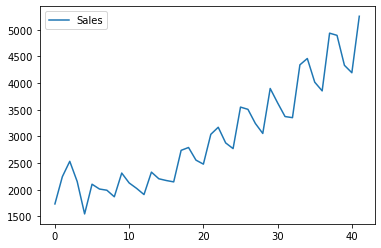

In [5]:
df.plot()

<AxesSubplot:>

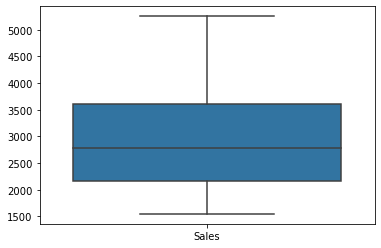

In [6]:
import seaborn as  sns
sns.boxplot(data =df)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

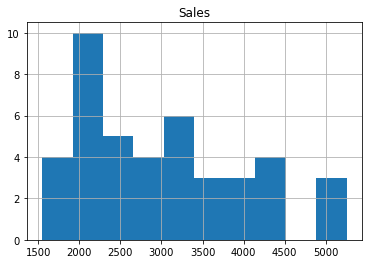

In [7]:
df.hist()

<AxesSubplot:ylabel='Density'>

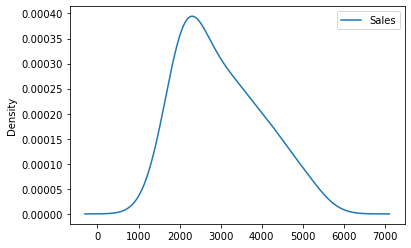

In [8]:
df.plot(kind="kde")

In [9]:
np.array(df["Sales"])

array([1734.82699966, 2244.96099854, 2533.80499268, 2154.96299744,
       1547.81899643, 2104.41199493, 2014.36299896, 1991.74699783,
       1869.04999924, 2313.63199615, 2128.31999969, 2026.82899857,
       1910.60399628, 2331.16499329, 2206.54999542, 2173.96799469,
       2148.27799988, 2739.30799866, 2792.7539978 , 2556.00999451,
       2480.97399902, 3039.522995  , 3172.11599731, 2879.00099945,
       2772.        , 3550.        , 3508.        , 3243.85999298,
       3056.        , 3899.        , 3629.        , 3373.        ,
       3352.        , 4342.        , 4461.        , 4017.        ,
       3854.        , 4936.        , 4895.        , 4333.        ,
       4194.        , 5253.        ])

C:\Users\kkdk0001\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


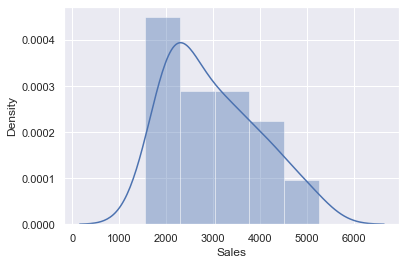

In [10]:
import seaborn as sns
sns.set_theme()
rk= sns.distplot(df['Sales'],kde=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

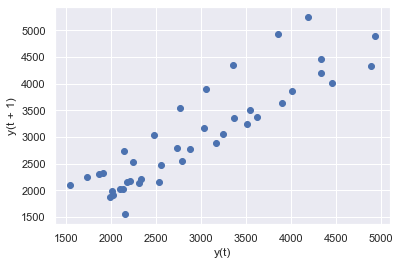

In [11]:
from pandas.plotting import lag_plot
lag_plot(df['Sales'])

In [12]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [13]:
len(df)

42

In [14]:
df['quarter'] = 0
for i in range(42):
    p=df['Quarter'][i]
    df['quarter'][i]=p[0:2]

C:\Users\kkdk0001\AppData\Local\Temp/ipykernel_20512/1036792352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'][i]=p[0:2]
C:\Users\kkdk0001\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [16]:

df['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

In [17]:
df_dummies=pd.DataFrame(pd.get_dummies(df['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([df,df_dummies],axis= 1)

In [18]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [20]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [21]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(df['Sales'])

In [22]:
cc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [23]:
train =cc.head(32)
test =cc.tail(10)

<AxesSubplot:>

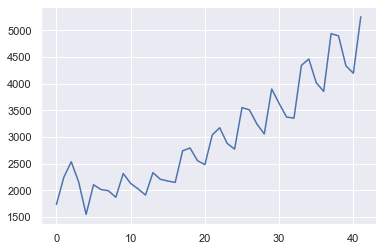

In [24]:
df['Sales'].plot()

In [25]:
# Models Building

In [26]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Linear Model

In [27]:
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767132

In [28]:
#Quadratic Model

In [29]:
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.7357355407399

In [30]:
# Exponential model

In [31]:
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

In [32]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


In [33]:
# Using ARIMA model

In [34]:
data = pd.read_excel("C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Forecasting\\CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [35]:
split_point = len(data) - 7
dataset_cc, validation_cc = data[0:split_point], data[split_point:]
print('Dataset_cc %d, Validation_cc %d' % (len(dataset_cc), len(validation_cc)))

Dataset_cc 35, Validation_cc 7


In [36]:
dataset_cc.to_csv('dataset_cc.csv', header=False)
validation_cc.to_csv('validation_cc.csv', header=False)

In [37]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

train = read_csv('dataset_cc.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Q1_94    3352.000000
Q2_94    4342.000000
Q3_94    4461.000000
Name: 1, dtype: float64

In [38]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [39]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
RMSE: 434.401


In [40]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,434.400665
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


In [ ]:
# The RMSE_ARMIA model has the least RMSE values and we can finalize this model

In [41]:
##   Airlines Passengers data set

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_excel("C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Forecasting\\Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [44]:
data.shape

(96, 2)

In [45]:
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])

In [46]:
data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


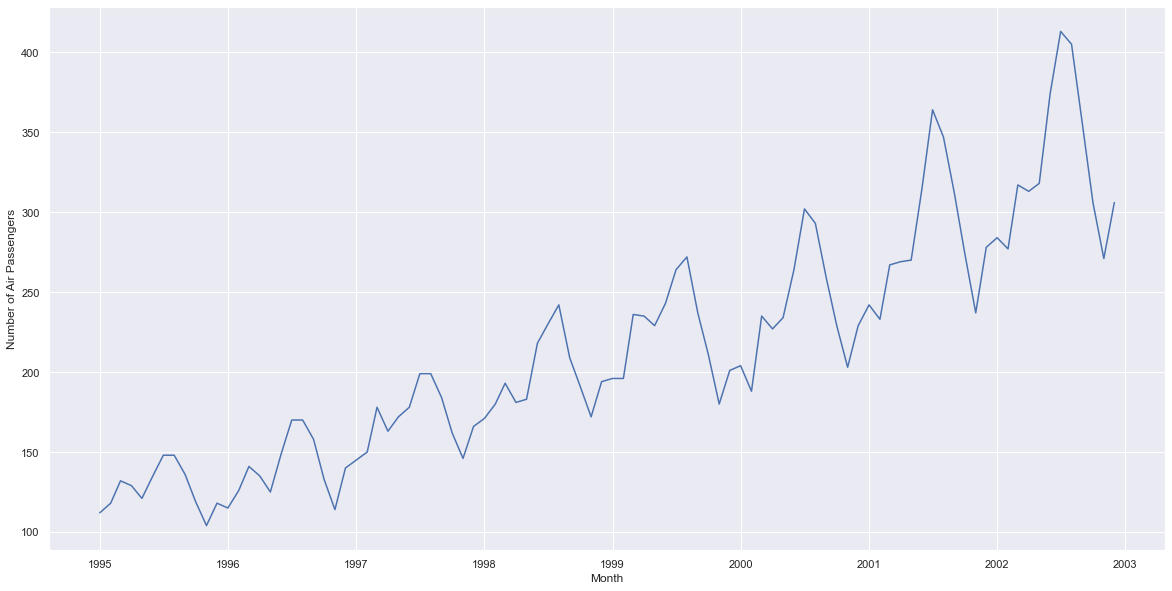

In [47]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

In [48]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01  126.666667
1996-01-01  126.916667
1996-02-01  127.583333
1996-03-01  128.333333
            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
1995-06-01         NaN
1995-07-01         NaN
1995-08-01         NaN
1995-09-01         NaN
1995-10-01         NaN
1995-11-01         NaN
1995-12-01   13.720147
1996-01-01   13.453342
1996-02-01   13.166475
1996-03-01   13.686977


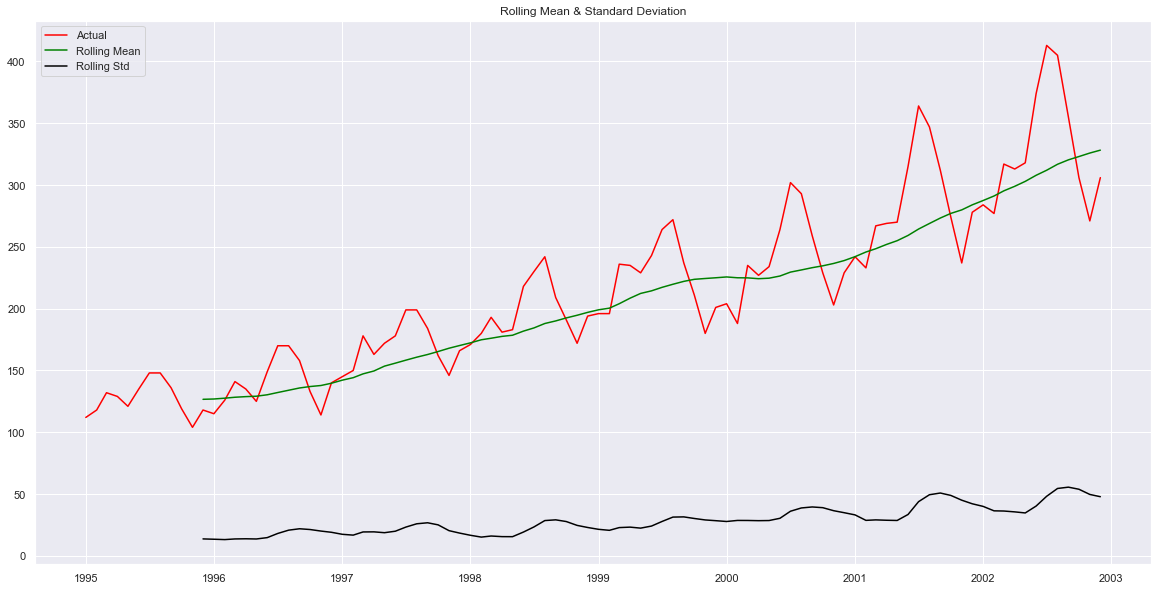

In [49]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [50]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


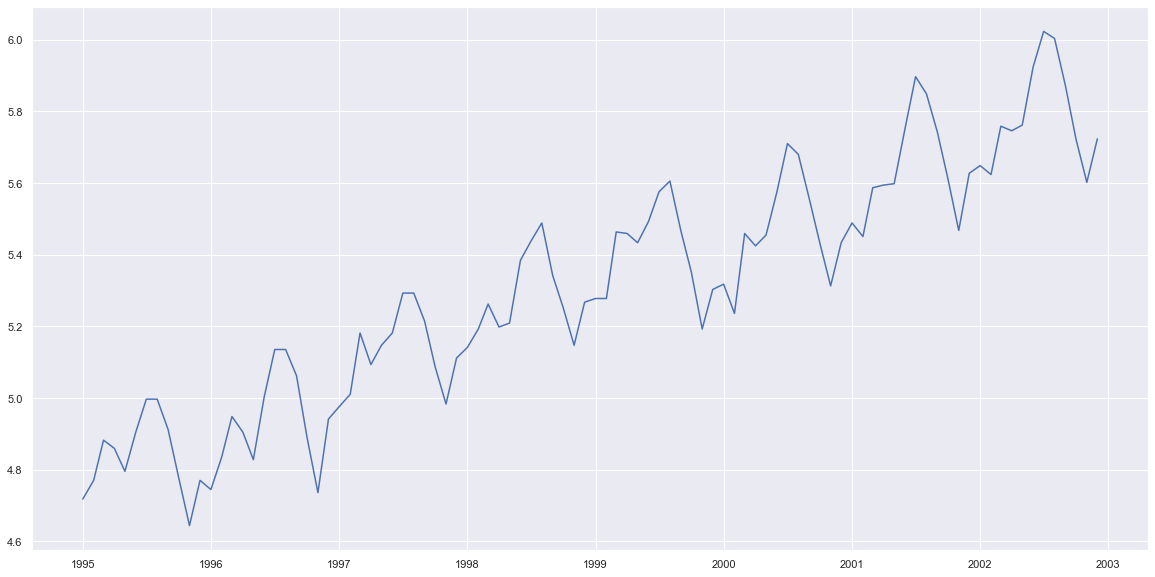

In [51]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

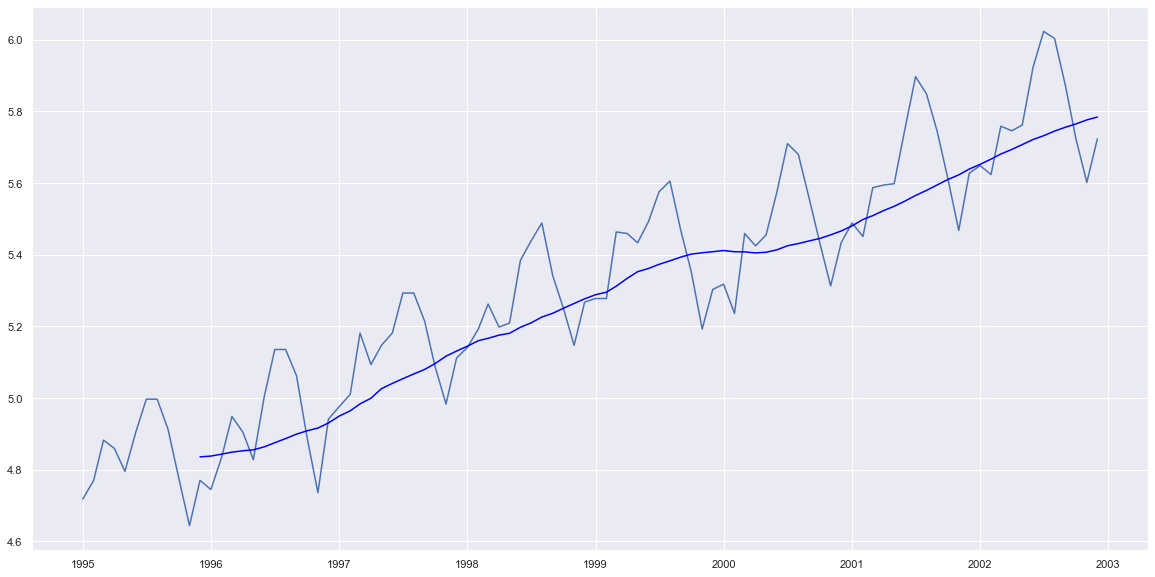

In [52]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [53]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN
1995-05-01,NaN
1995-06-01,NaN
1995-07-01,NaN
1995-08-01,NaN
1995-09-01,NaN


In [54]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


In [55]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

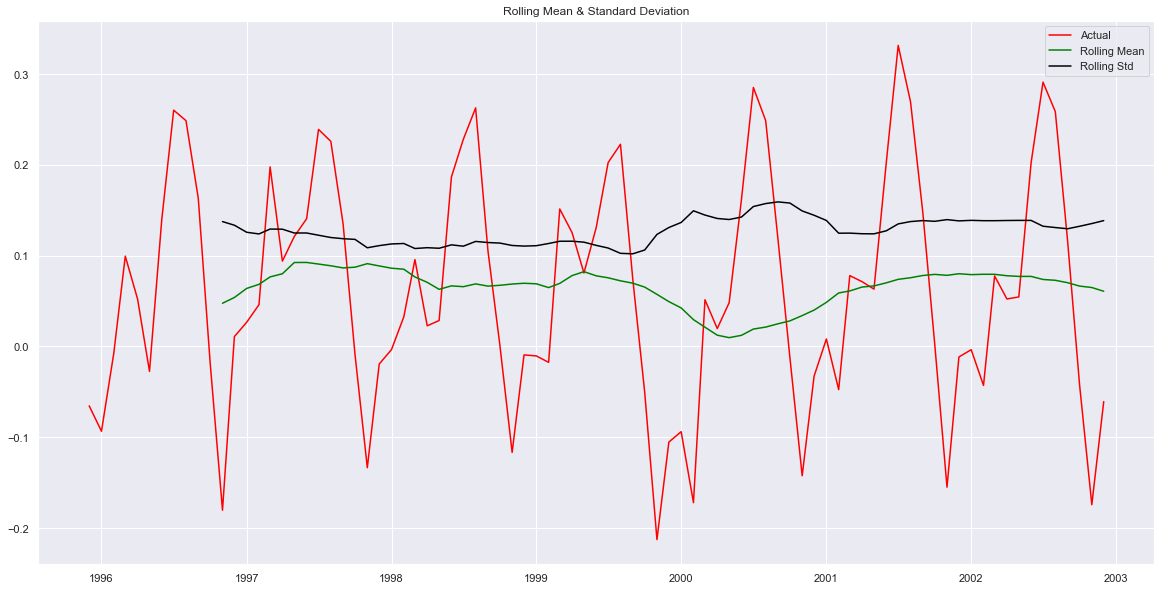

Dickey-Fuller Test: 
Test Statistic          -1.910930
p-value                  0.326937
Lags Used               12.000000
No. of Obs              72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


In [56]:
stationarity(data_log_diff)

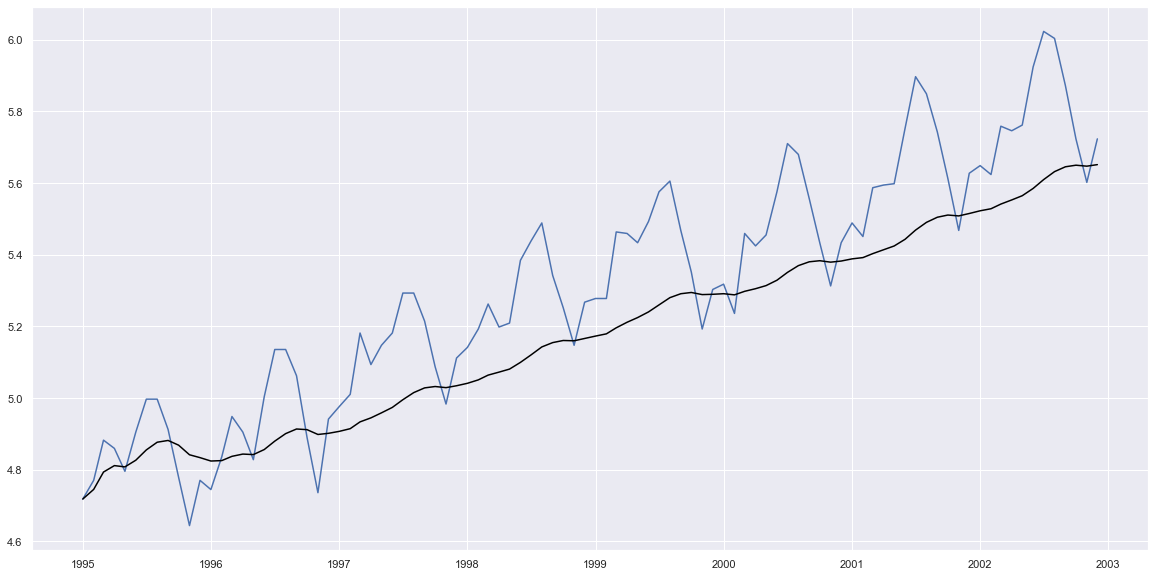

In [57]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

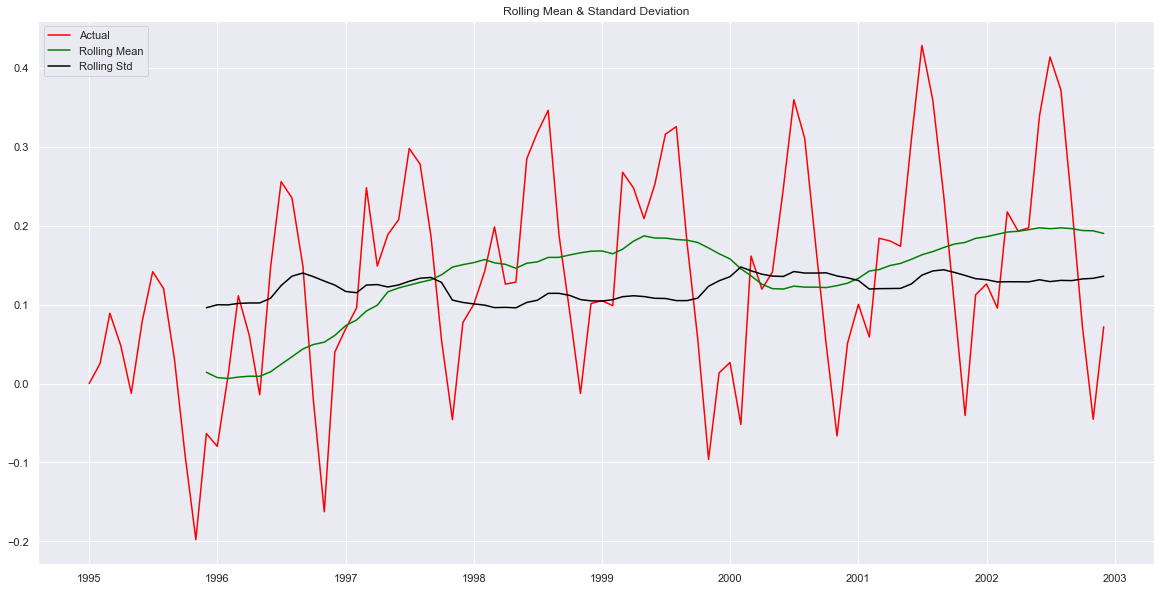

Dickey-Fuller Test: 
Test Statistic          -2.835036
p-value                  0.053441
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


In [58]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

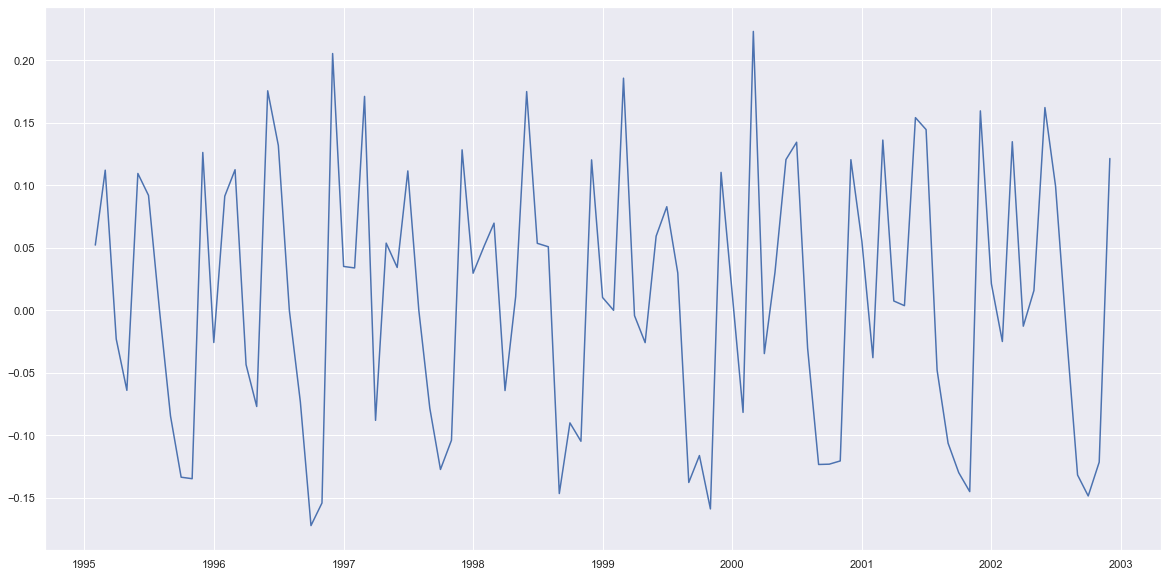

In [59]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

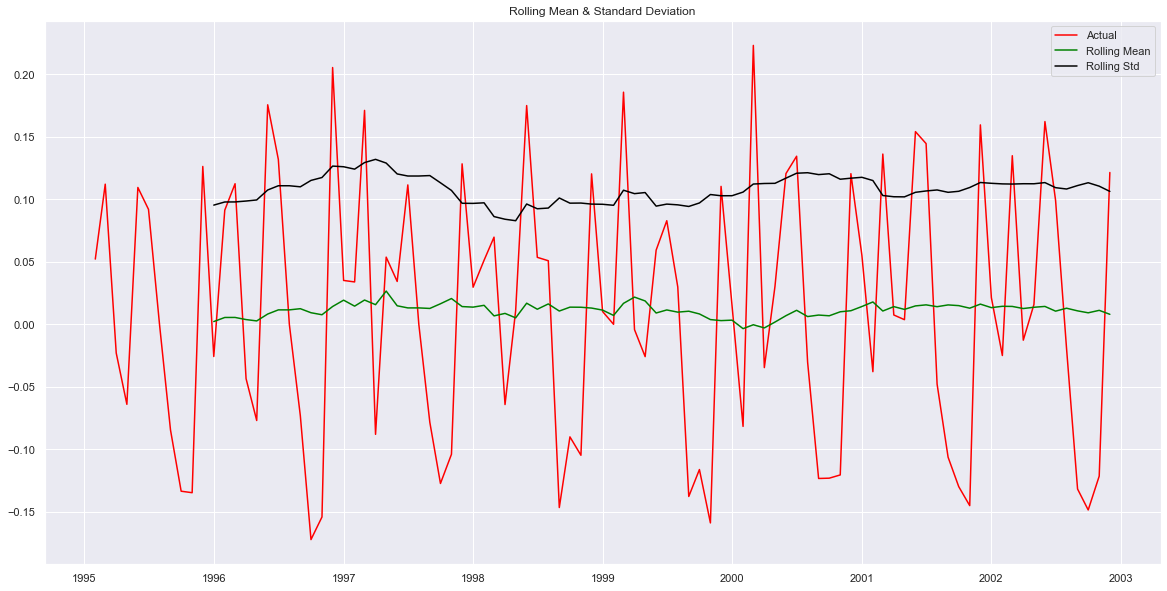

Dickey-Fuller Test: 
Test Statistic          -2.670823
p-value                  0.079225
Lags Used               12.000000
No. of Obs              82.000000
Critical Value (1%)     -3.512738
Critical Value (5%)     -2.897490
Critical Value (10%)    -2.585949
dtype: float64


In [60]:
data_shift=data_shift.dropna()
stationarity(data_shift)

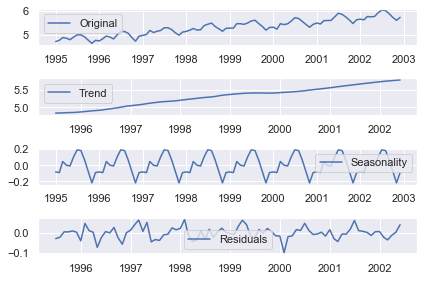

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

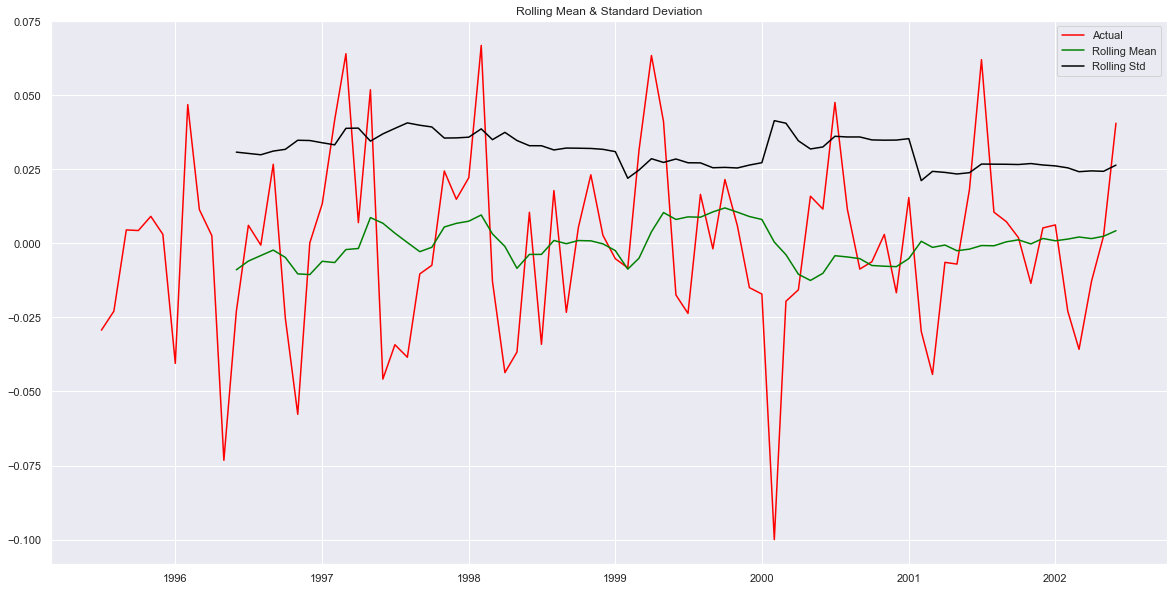

Dickey-Fuller Test: 


KeyError: 'Passengers'

In [62]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

Text(0.5, 1.0, 'Autocorrelation Function')

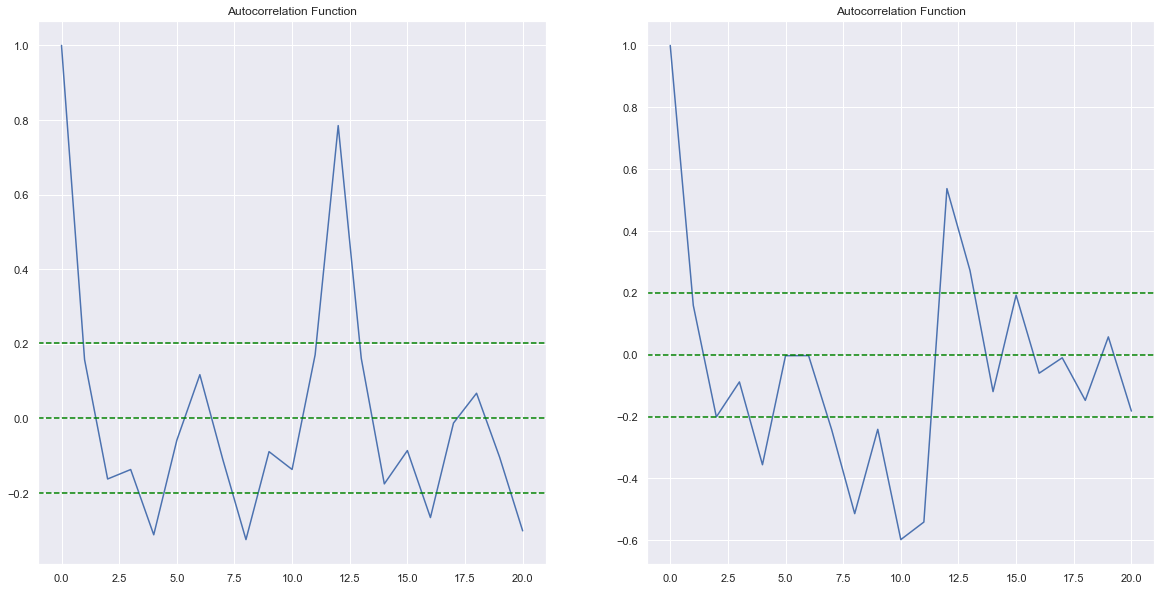

In [63]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

In [64]:
# ARIMA model

plotting ARIMA model


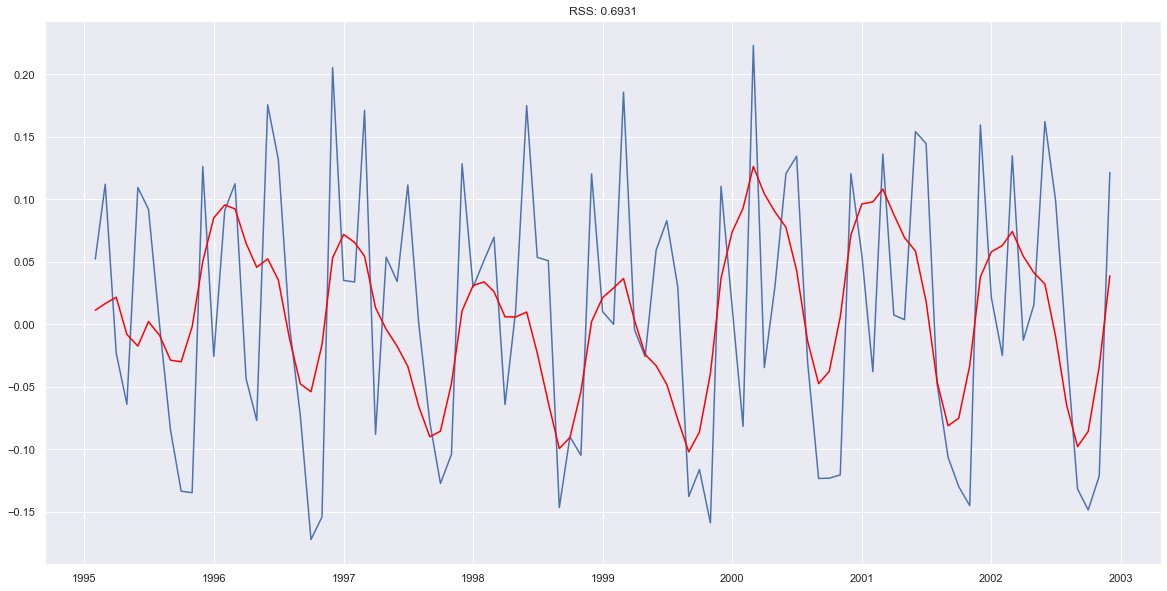

In [65]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['Passengers'])**2))
print('plotting ARIMA model')

In [66]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

Month
1995-02-01    0.011261
1995-03-01    0.016603
1995-04-01    0.021664
1995-05-01   -0.008096
1995-06-01   -0.017396
dtype: float64


In [67]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1995-02-01    0.011261
1995-03-01    0.027864
1995-04-01    0.049528
1995-05-01    0.041431
1995-06-01    0.024036
dtype: float64


In [68]:
predictions_log=pd.Series(data_log['Passengers'])
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

Month
1995-01-01    4.718499
1995-02-01    4.781946
1995-03-01    4.910666
1995-04-01    4.909340
1995-05-01    4.837222
dtype: float64

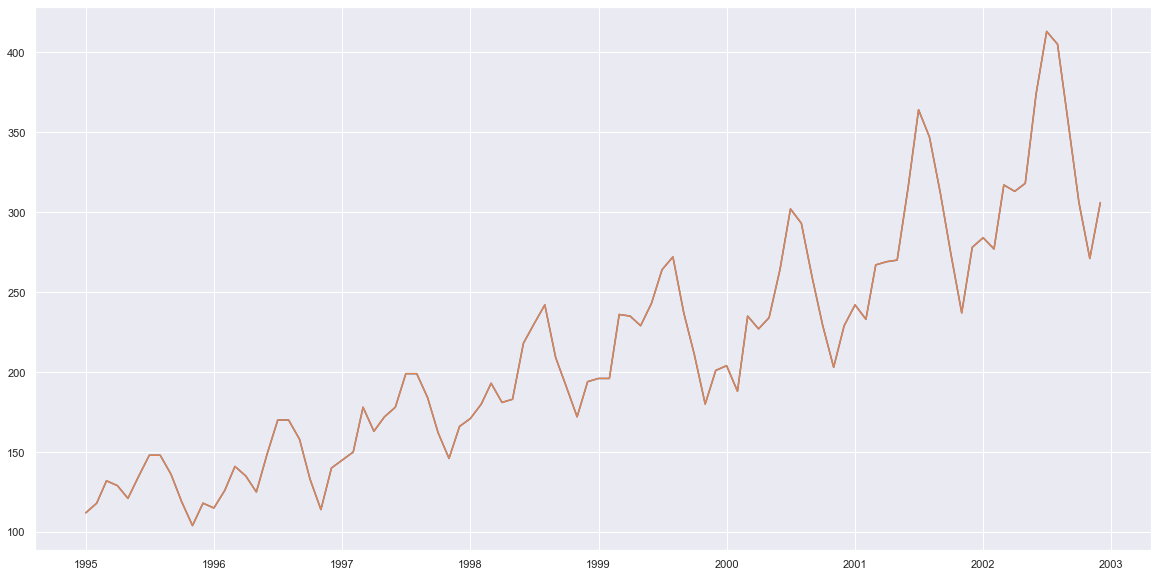

In [69]:
predictions_ARIMA=np.exp(pd.Series(data_log['Passengers']))
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

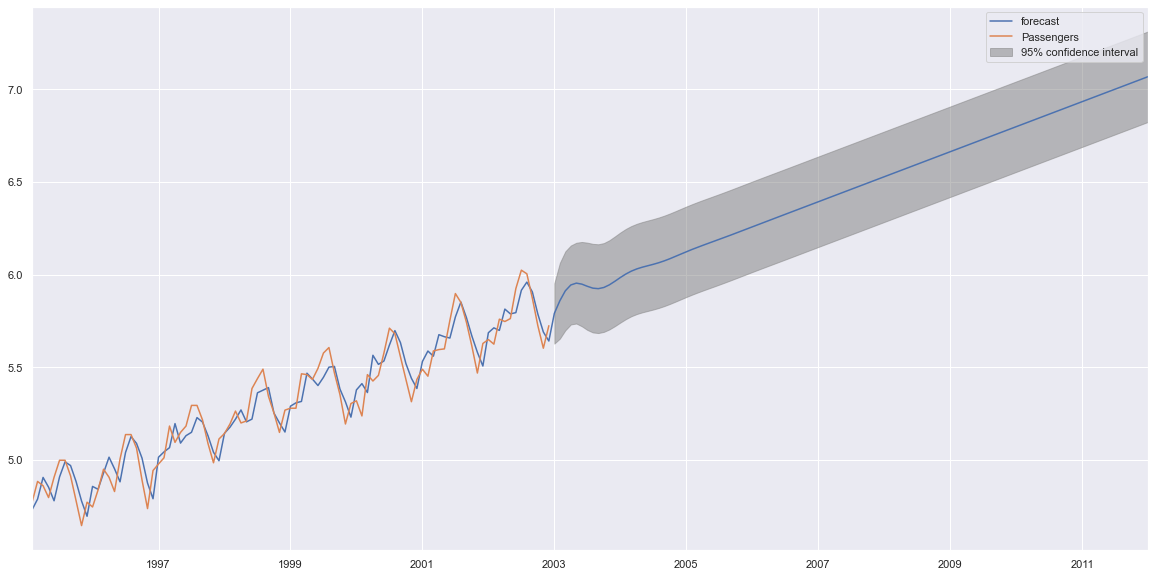

In [70]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

In [71]:
results.forecast(steps=120)

(array([5.78999347, 5.85825354, 5.91203908, 5.94359082, 5.95347999,
        5.94812713, 5.93639028, 5.92642837, 5.92363312, 5.92990509,
        5.94409992, 5.96319474, 5.98365044, 6.0025372 , 6.01817729,
        6.03026132, 6.0395525 , 6.0473759 , 6.05509425, 6.06371946,
        6.07372974, 6.08508581, 6.09738604, 6.11007892, 6.12265778,
        6.13478886, 6.14635567, 6.15743069, 6.16820263, 6.17889162,
        6.18967944, 6.20066976, 6.21188118, 6.2232658 , 6.23474101,
        6.24622213, 6.25764644, 6.26898446, 6.28023888, 6.29143482,
        6.30260661, 6.31378572, 6.3249928 , 6.336235  , 6.34750772,
        6.35879919, 6.37009571, 6.38138601, 6.39266368, 6.4039276 ,
        6.41518078, 6.42642837, 6.43767563, 6.44892645, 6.46018265,
        6.47144404, 6.48270905, 6.49397554, 6.50524157, 6.51650585,
        6.52776795, 6.53902815, 6.55028719, 6.56154592, 6.57280504,
        6.58406495, 6.59532572, 6.60658715, 6.61784893, 6.62911073,
        6.6403723 , 6.65163354, 6.66289445, 6.67